<a href="https://colab.research.google.com/github/nitish22066/QTSP-DATA-SCIENCE/blob/main/mini_project1_ipl.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
url1='https://raw.githubusercontent.com/nitish22066/QTSP-DATA-SCIENCE/main/deliveries%20-%20deliveries.csv?token=ARKLD2AG4WEX7EKFFEIPDLDA7LOCM'
deliveries=pd.read_csv(url1)
url2='https://raw.githubusercontent.com/nitish22066/QTSP-DATA-SCIENCE/main/matches%20-%20matches.csv?token=ARKLD2HWZRGFS5YKOGG6XADA7LOWK'
matches=pd.read_csv(url2)
deliveries

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,wide_runs,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN
2,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,4,0,4,NaN,NaN,NaN
3,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,4,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN
4,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,5,DA Warner,S Dhawan,TS Mills,0,2,0,0,0,0,0,2,2,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
179073,11415,2,Chennai Super Kings,Mumbai Indians,20,2,RA Jadeja,SR Watson,SL Malinga,0,0,0,0,0,0,1,0,1,NaN,NaN,NaN
179074,11415,2,Chennai Super Kings,Mumbai Indians,20,3,SR Watson,RA Jadeja,SL Malinga,0,0,0,0,0,0,2,0,2,NaN,NaN,NaN
179075,11415,2,Chennai Super Kings,Mumbai Indians,20,4,SR Watson,RA Jadeja,SL Malinga,0,0,0,0,0,0,1,0,1,SR Watson,run out,KH Pandya
179076,11415,2,Chennai Super Kings,Mumbai Indians,20,5,SN Thakur,RA Jadeja,SL Malinga,0,0,0,0,0,0,2,0,2,NaN,NaN,NaN


In [ ]:
matches.describe()

,id,season,dl_applied,win_by_runs,win_by_wickets
count,756.000000,756.000000,756.000000,756.000000,756.000000
mean,1792.178571,2013.444444,0.025132,13.283069,3.350529
std,3464.478148,3.366895,0.156630,23.471144,3.387963
min,1.000000,2008.000000,0.000000,0.000000,0.000000
25%,189.750000,2011.000000,0.000000,0.000000,0.000000
50%,378.500000,2013.000000,0.000000,0.000000,4.000000
75%,567.250000,2016.000000,0.000000,19.000000,6.000000
max,11415.000000,2019.000000,1.000000,146.000000,10.000000


In [ ]:
matches.isnull().sum()


id                   0
season               0
city                 7
date                 0
team1                0
team2                0
toss_winner          0
toss_decision        0
result               0
dl_applied           0
winner               4
win_by_runs          0
win_by_wickets       0
player_of_match      4
venue                0
umpire1              2
umpire2              2
umpire3            637
dtype: int64

In [ ]:
matches=matches.drop(columns=['umpire3'], axis=1)
matches=matches.drop(columns=['umpire2'], axis=1)
matches=matches.drop(columns=['umpire1'], axis=1)

In [ ]:
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [ ]:
#Q1-a)TEAM WITH MOST NUMBER OF WINS(MATCHES)
c=matches.replace(to_replace ="Rising Pune Supergiant",value ="Rising Pune Supergiants")['winner'].value_counts()
winners=pd.DataFrame(columns=["team", "wins"])
for i in c.iteritems():
    d = pd.DataFrame({'team':[i[0]],'wins':[i[1]]})
    winners=winners.append(d)
winners.index = range(1,len(winners)+1)
winners

,team,wins
1,Mumbai Indians,109
2,Chennai Super Kings,100
3,Kolkata Knight Riders,92
4,Royal Challengers Bangalore,84
5,Kings XI Punjab,82
6,Rajasthan Royals,75
7,Delhi Daredevils,67
8,Sunrisers Hyderabad,58
9,Deccan Chargers,29
10,Rising Pune Supergiants,15


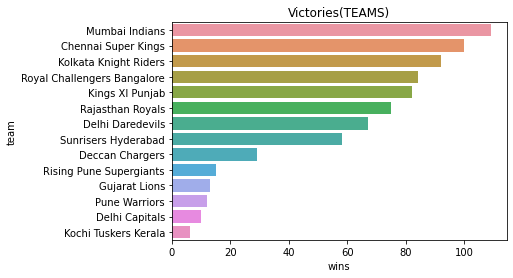

In [ ]:

sns.barplot(x='wins', y='team', data=winners)

In [ ]:
#Q1-b)TEAM WITH MOST NUMBER OF WINS(SEASON)
s=matches.replace(to_replace ="Rising Pune Supergiant",value ="Rising Pune Supergiants").groupby('season')['winner'].last().value_counts()
winners_season=pd.DataFrame(columns=["team", "wins"])
for i in s.iteritems():
    d = pd.DataFrame({'team':[i[0]],'wins':[i[1]]})
    winners_season=winners_season.append(d)
 
winners_season.index = range(1,len(winners_season)+1)
winners_season

,team,wins
1,Mumbai Indians,4
2,Chennai Super Kings,3
3,Kolkata Knight Riders,2
4,Deccan Chargers,1
5,Sunrisers Hyderabad,1
6,Rajasthan Royals,1


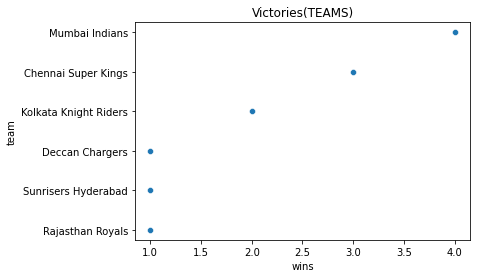

In [ ]:

sns.scatterplot(x='wins', y='team', data=winners_season)

In [ ]:
#Q1-c)TEAM WITH MOST NUMBER OF RUNS
a=pd.DataFrame()
a=matches.replace(to_replace ="Rising Pune Supergiant",value ="Rising Pune Supergiants").groupby('winner')['win_by_runs'].sum().sort_values( ascending=False)
winners_by_runs=pd.DataFrame(columns=["team", "total win by runs"])
for i in a.iteritems():
    d = pd.DataFrame({'team':[i[0]],'total win by runs':[i[1]]})
    winners_by_runs=winners_by_runs.append(d)

 
winners_by_runs.index = range(1,len(winners_by_runs)+1)
winners_by_runs

,team,total win by runs
1,Mumbai Indians,1866
2,Chennai Super Kings,1778
3,Royal Challengers Bangalore,1252
4,Kolkata Knight Riders,1086
5,Kings XI Punjab,925
6,Rajasthan Royals,895
7,Sunrisers Hyderabad,713
8,Delhi Daredevils,675
9,Deccan Chargers,421
10,Rising Pune Supergiants,176


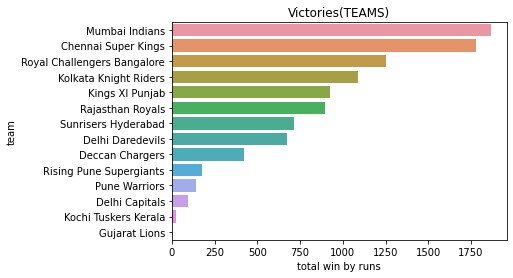

In [ ]:

sns.barplot(x='total win by runs', y='team', data=winners_by_runs)

In [ ]:
b=pd.DataFrame()
b=matches.replace(to_replace ="Rising Pune Supergiant",value ="Rising Pune Supergiants").groupby('winner')['win_by_wickets'].sum().sort_values(ascending=False)
b
winners_by_wickets=pd.DataFrame(columns=["team", "total win by wickets"])
for i in b.iteritems():
    d = pd.DataFrame({'team':[i[0]],'total win by wickets':[i[1]]})
    winners_by_wickets=winners_by_wickets.append(d)

 
winners_by_wickets.index = range(1,len(winners_by_wickets)+1)
winners_by_wickets

,team,total win by wickets
1,Kolkata Knight Riders,351
2,Royal Challengers Bangalore,314
3,Mumbai Indians,307
4,Chennai Super Kings,289
5,Delhi Daredevils,275
6,Rajasthan Royals,273
7,Kings XI Punjab,268
8,Sunrisers Hyderabad,173
9,Deccan Chargers,72
10,Gujarat Lions,65


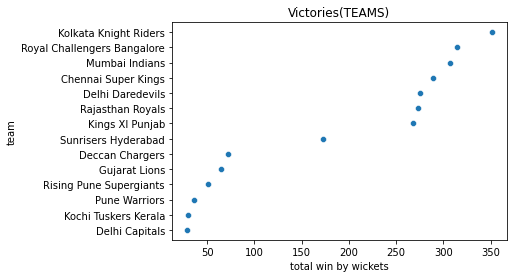

In [ ]:

sns.barplot(x='total win by wickets', y='team', data=winners_by_wickets)

In [ ]:
"""
THE 4 barplots clearly show that Mumbai Indians is the most succesful team,followed by Chennai Super Kings,Kolkata Knight Riders,Royal Challengers Bangalore,
Kings XI Punjab and Rajasthan Royals
"""

In [ ]:
#Q2-a)most valuable player
m=matches.replace(to_replace ="Rising Pune Supergiant",value ="Rising Pune Supergiants")['player_of_match'].value_counts()

mvp= pd.DataFrame(columns=["player", "wins"])

for i in m.iteritems():
    
        d = pd.DataFrame({
            'player':[i[0]],
            'wins':[i[1]]
        })
        mvp= mvp.append(d)
          	
mvp.index = range(1,len(mvp)+1)
mvp.head(20)

,player,wins
1,CH Gayle,21
2,AB de Villiers,20
3,RG Sharma,17
4,MS Dhoni,17
5,DA Warner,17
6,YK Pathan,16
7,SR Watson,15
8,SK Raina,14
9,G Gambhir,13
10,MEK Hussey,12


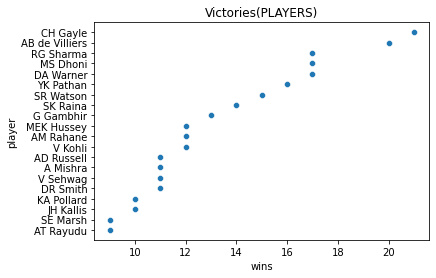

In [ ]:


sns.barplot(x='wins', y='player',data=mvp.head(20))

In [ ]:
#Q2-b)Player who scored most number of runs/Orange cap
k=deliveries.groupby('batsman')['total_runs'].sum().sort_values(ascending=False)
best_batsman= pd.DataFrame(columns=["player", "runs"])

for i in k.iteritems():
    
        d = pd.DataFrame({
            'player':[i[0]],
            'runs':[i[1]]
        })
        best_batsman= best_batsman.append(d)
          	
best_batsman.index = range(1,len(best_batsman)+1)
best_batsman.head(20)

,player,runs
1,SK Raina,5651
2,V Kohli,5616
3,RG Sharma,5057
4,DA Warner,4975
5,S Dhawan,4876
6,CH Gayle,4873
7,RV Uthappa,4703
8,MS Dhoni,4691
9,AB de Villiers,4583
10,G Gambhir,4485


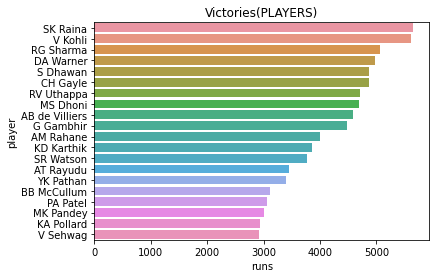

In [ ]:


sns.barplot(x='runs', y='player',data=best_batsman.head(20))

In [ ]:
#most no.of wickets(Purple Cap)
l=deliveries[(deliveries['dismissal_kind']=='bowled') | (deliveries['dismissal_kind']=='lbw')]
n=l['bowler'].value_counts()
best_bowler= pd.DataFrame(columns=["player", "wickets/lbw"])

for i in n.iteritems():
    
        d = pd.DataFrame({
            'player':[i[0]],
            'wickets/lbw':[i[1]]
        })
        best_bowler=best_bowler.append(d)
          	
best_bowler.index = range(1,len(best_bowler)+1)
best_bowler.head(20)

,player,wickets/lbw
1,SL Malinga,74
2,PP Chawla,59
3,SP Narine,51
4,B Kumar,43
5,RA Jadeja,38
6,A Mishra,38
7,Harbhajan Singh,37
8,R Ashwin,36
9,DW Steyn,32
10,Rashid Khan,31


In [ ]:
sns.barplot(x='wickets/lbw', y='player',data=best_bowler.head(20))

In [ ]:
o=deliveries[(deliveries['dismissal_kind']=='caught') | (deliveries['dismissal_kind']=='run out')]
q=o['fielder'].value_counts()
best_fielder= pd.DataFrame(columns=["player", "caught/run out"])

for i in q.iteritems():
    
        d = pd.DataFrame({
            'player':[i[0]],
            'caught/run out':[i[1]]
        })
        best_fielder=best_fielder.append(d)
          	
best_fielder.index=range(1,len(best_fielder)+1)
best_fielder.head(20)

,player,caught/run out
1,KD Karthik,123
2,MS Dhoni,121
3,SK Raina,115
4,AB de Villiers,107
5,RV Uthappa,93
6,RG Sharma,92
7,V Kohli,90
8,KA Pollard,85
9,PA Patel,81
10,RA Jadeja,80


In [ ]:
sns.barplot(x='wickets/lbw', y='player',data=best_fielder(20))

In [ ]:


"""
The 4 barplots above clarly signify that
Order for most valuable player- CH Gayle,AB de Villiers,RG Sharma,DA Warner,MS Dhoni,YK Pathan,SR Watson,SK Raina,G Gambhir,AM Rahane are the best all-rounders.
Order for the best batsman-SK Raina,V Kohli,RG Sharma,DA Warner,S Dhawan,CH Gayle,RV Uthappa,MS Dhoni,AB de Villiers,G Gambhir
Order for the best bowler-SL Malinga,PP Chawla,SP Narine,B Kuma,RA Jadeja,A Mishra,Harbhajan Singh,R Ashwin,DW Steyn,Z Khan	
Order for the best fielder-KD Karthik,MS Dhoni,SK Raina,AB de Villiers,RV Uthappa,RG Sharma,V Kohli,KA Pollard,PA Patel,RA Jadeja	
-AB de Villiers,RG Sharma,MS Dhoni,DA Warner
Hence a company can endorse these players(in order starting from most beneficial) 
 1)AB de Villiers,RG Sharma, CH Gayle,MS Dhoni,V Kohli,SK Raina,DA Warner,G Gambhir,SL Malinga,RA Jadeja,AM Rahane,SP Narine,KD Karthik,KA Pollard,RV Uthappa

"""

'\nThe 4 barplots above clarly signify that\nOrder for most valuable player- CH Gayle,AB de Villiers,RG Sharma,DA Warner,MS Dhoni,YK Pathan,SR Watson,SK Raina,G Gambhir,AM Rahane are the best all-rounders.\nOrder for the best batsman-SK Raina,V Kohli,RG Sharma,DA Warner,S Dhawan,CH Gayle,RV Uthappa,MS Dhoni,AB de Villiers,G Gambhir\nOrder for the best bowler-SL Malinga,PP Chawla,SP Narine,B Kuma,RA Jadeja,A Mishra,Harbhajan Singh,R Ashwin,DW Steyn,Z Khan\t\nOrder for the best fielder-KD Karthik,MS Dhoni,SK Raina,AB de Villiers,RV Uthappa,RG Sharma,V Kohli,KA Pollard,PA Patel,RA Jadeja\t\n-AB de Villiers,RG Sharma,MS Dhoni,DA Warner\n'

In [ ]:
#Q3-factors contributing to the win or loss of a team.
w=matches['venue'].value_counts()

location= pd.DataFrame(columns=["venue", "matches"])

for i in w.iteritems():
    
        d = pd.DataFrame({
            'venue':[i[0]],
            'matches':[i[1]]
        })
        location=location.append(d)
          	
location.index=range(1,len(location)+1)
location.head(10)


,venue,matches
1,Eden Gardens,77
2,Wankhede Stadium,73
3,M Chinnaswamy Stadium,73
4,Feroz Shah Kotla,67
5,"Rajiv Gandhi International Stadium, Uppal",56
6,"MA Chidambaram Stadium, Chepauk",49
7,Sawai Mansingh Stadium,47
8,"Punjab Cricket Association Stadium, Mohali",35
9,Maharashtra Cricket Association Stadium,21
10,Subrata Roy Sahara Stadium,17


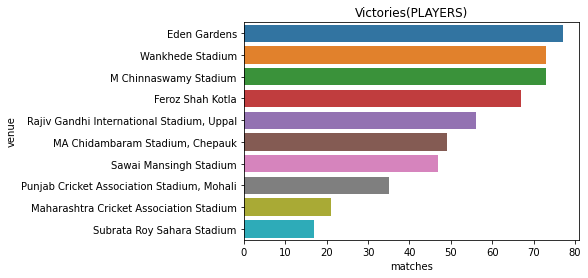

In [ ]:
sns.barplot(x='matches', y='venue',data=location.head(10))

In [ ]:
#team which won the match and the toss 

s=matches[(matches['toss_winner']==matches['winner'])]
t=s['toss_winner'].value_counts()

toss= pd.DataFrame(columns=["team", "wins"])

for items in t.iteritems():
    d= pd.DataFrame({
        'team':[items[0]],
        'wins':[items[1]]
    })
    toss=toss.append(d) 
toss.index=range(1,len(toss)+1)
toss.head(20)


,team,wins
1,Chennai Super Kings,57
2,Mumbai Indians,56
3,Kolkata Knight Riders,53
4,Rajasthan Royals,42
5,Royal Challengers Bangalore,41
6,Kings XI Punjab,35
7,Delhi Daredevils,35
8,Sunrisers Hyderabad,23
9,Deccan Chargers,19
10,Gujarat Lions,10


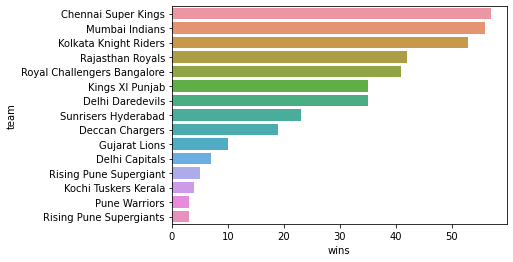

In [ ]:
sns.barplot(x='wins', y='team',data=toss.head(20))

In [ ]:


m=matches['city'].value_counts()


city= pd.DataFrame(columns=['city', 'matches'])
for items in m.iteritems():
    d = pd.DataFrame({
        'city':[items[0]],
        'matches':[items[1]]
    })
    city = city.append(d)
city.index=range(1,len(city)+1)
city.head(20)

,city,matches
1,Mumbai,101
2,Kolkata,77
3,Delhi,74
4,Bangalore,66
5,Hyderabad,64
6,Chennai,57
7,Jaipur,47
8,Chandigarh,46
9,Pune,38
10,Durban,15


In [ ]:
sns.barplot(x='matches', y='city',data=city.head(20))

In [ ]:
"""
1)Venue-Most of the matches are played in statiums situated in the home state of the most succesful teams such as Mumbai Indians,KKR,CSK,RCB,SRH,RR
Hence venue plays an important role in determining the success of a team
2)Toss-Teams such as Chennai Super Kings,Mumbai Indians,Kolkata Knight Riders,Rajasthan Royals and Royal Challengers Bangalore won most number of the matches
in IPL in which they won the toss as well.Hence toss does serve as an important factor in determining the success of a team
3)City- Most of the matches are played in home cities of the most succesful teams such as Mumbai Indians,KKR,RCB,CSK,SRH,RR
Hence venue plays an important role in determining the success of a team